In [ ]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


# instruction to the notebook stating warning should nit be displays
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
adfile = files.upload()

Saving cars.csv to cars (1).csv


In [ ]:
df=pd.read_csv('cars.csv')

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,body-style,drive-wheels,engine-location,width,height,engine-type,engine-size,horsepower,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,13495
1,3,?,alfa-romero,gas,convertible,rwd,front,64.1,48.8,dohc,130,111,21,27,16500
2,1,?,alfa-romero,gas,hatchback,rwd,front,65.5,52.4,ohcv,152,154,19,26,16500
3,2,164,audi,gas,sedan,fwd,front,66.2,54.3,ohc,109,102,24,30,13950
4,2,164,audi,gas,sedan,4wd,front,66.4,54.3,ohc,136,115,18,22,17450


In [ ]:
df['normalized-losses'].replace('?',np.nan,inplace=True)
df['normalized-losses']=df['normalized-losses'].astype(float)
df['normalized-losses'].fillna(df['normalized-losses'].mean(),inplace=True)

In [ ]:
df['horsepower'].replace('?',np.nan,inplace=True)
df['horsepower']=df['horsepower'].astype(float)

df['horsepower'].fillna(df['horsepower'].mean(),inplace=True)

In [ ]:
df_cat = df.select_dtypes(object)
df_num = df.select_dtypes(["int64","float64"])

In [ ]:
# for skew  import library
from scipy.stats import skew

0.423806868842261


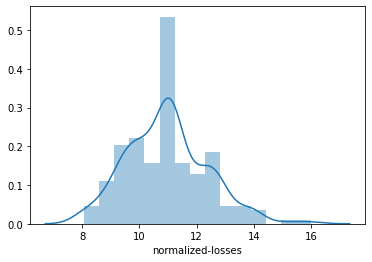

In [ ]:
df_num['normalized-losses'] = np.sqrt(df_num['normalized-losses'])
print(skew(df_num['normalized-losses']))
sns.distplot(df_num['normalized-losses'])
plt.show()
# its reduce to 0.2245

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
    le = LabelEncoder()
    df_cat[col] = le.fit_transform(df_cat[col])
df_cat.head()

,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,0,1,0,2,0,0
1,0,1,0,2,0,0
2,0,1,2,2,0,5
3,1,1,3,1,0,3
4,1,1,3,0,0,3


In [ ]:
df_new = pd.concat([df_num, df_cat], axis=1)
df_new.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,3,11.045361,64.1,48.8,130,111.0,21,27,13495,0,1,0,2,0,0
1,3,11.045361,64.1,48.8,130,111.0,21,27,16500,0,1,0,2,0,0
2,1,11.045361,65.5,52.4,152,154.0,19,26,16500,0,1,2,2,0,5
3,2,12.806248,66.2,54.3,109,102.0,24,30,13950,1,1,3,1,0,3
4,2,12.806248,66.4,54.3,136,115.0,18,22,17450,1,1,3,0,0,3


In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df_mm = df_new.copy()

In [ ]:
for col in df_mm:
    mm = MinMaxScaler()
    df_mm[col] = mm.fit_transform(df_mm[[col]])
df_mm.head()

,symboling,normalized-losses,width,height,engine-size,horsepower,city-mpg,highway-mpg,price,make,fuel-type,body-style,drive-wheels,engine-location,engine-type
0,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.207959,0.000000,1.0,0.00,1.0,0.0,0.000000
1,1.0,0.375813,0.316667,0.083333,0.260377,0.262500,0.222222,0.289474,0.282558,0.000000,1.0,0.00,1.0,0.0,0.000000
2,0.6,0.375813,0.433333,0.383333,0.343396,0.441667,0.166667,0.263158,0.282558,0.000000,1.0,0.50,1.0,0.0,0.833333
3,0.8,0.597650,0.491667,0.541667,0.181132,0.225000,0.305556,0.368421,0.219254,0.047619,1.0,0.75,0.5,0.0,0.500000
4,0.8,0.597650,0.508333,0.541667,0.283019,0.279167,0.138889,0.157895,0.306142,0.047619,1.0,0.75,0.0,0.0,0.500000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
x = df_new.drop('price',axis=1)
y = df_new['price']
x_train,x_test , y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1)
lr= LinearRegression()
lr.fit(x_train,y_train)
print("""slope={}
intercept={}
Bias={}
Variance={}""".format(lr.coef_,lr.intercept_,lr.score(x_train,y_train),lr.score(x_test,y_test)))

slope=[ 5.36315435e+01  1.76816770e+01  7.91076802e+02  3.60751274e+02
  9.83533651e+01 -1.08980642e+01  3.07189304e+02 -4.16456972e+02
 -2.00669448e+02 -6.20255975e+02 -1.64994750e+02  1.88244501e+03
  1.64015556e+04  2.81148511e+02]
intercept=-65049.14592298511
Bias=0.8504452380430954
Variance=0.7965477176995526


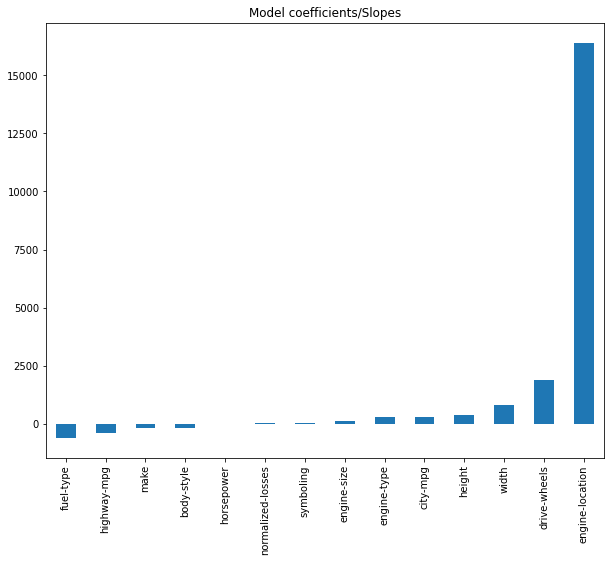

In [ ]:
cols=x_train.columns
coef=pd.Series(lr.coef_,cols).sort_values()
plt.figure(figsize=(10,8))
coef.plot(kind="bar",title="Model coefficients/Slopes")
plt.show()

In [ ]:
coef

fuel-type             -620.255975
highway-mpg           -416.456972
make                  -200.669448
body-style            -164.994750
horsepower             -10.898064
normalized-losses       17.681677
symboling               53.631544
engine-size             98.353365
engine-type            281.148511
city-mpg               307.189304
height                 360.751274
width                  791.076802
drive-wheels          1882.445012
engine-location      16401.555628
dtype: float64

In [ ]:
from sklearn.linear_model import Lasso,Ridge


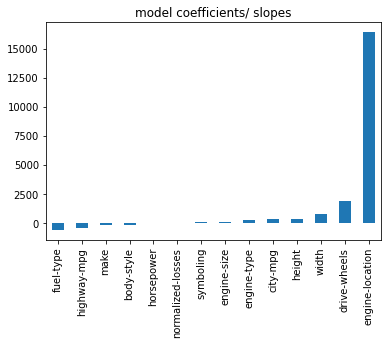

In [ ]:
r = Ridge(0.5)
r.fit(x_train,y_train)
cols = x_train.columns
coef = pd.Series(lr.coef_,cols).sort_values()
coef.plot(kind="bar",title="model coefficients/ slopes")

In [ ]:
coef

In [ ]:
for i in range(50):
  r= Ridge(alpha=i)
  r.fit(x_train,y_train)
  print(i,"=",r.score(x_test,y_test))

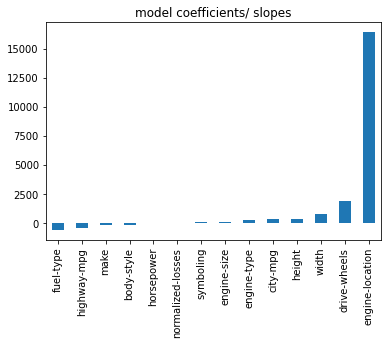

In [ ]:
r = Lasso(0.5)
r.fit(x_train,y_train)
cols = x_train.columns
coef = pd.Series(lr.coef_,cols).sort_values()
coef.plot(kind="bar",title="model coefficients/ slopes")
plt.show()

In [ ]:
for i in range(100,500,5):
  r=Lasso(alpha=i)
  r.fit(x_train,y_train)
  print(i,"=",r.score(x_test,y_test))

In [ ]:
#cross validation
from sklearn.model_selection import cross_val_score

In [ ]:
crossval=cross_val_score(lr,x,y,cv=4)

In [ ]:
np.mean(crossval)

0.5934697890126068